# Reading multiple csv files with Spark


In [1]:
# Import our SparkSession so we can use it
from pyspark.sql import SparkSession
# Create our SparkSession, this can take a couple minutes locally
spark = SparkSession.builder.appName("basics").getOrCreate()

In [11]:
# Load in data
from pyspark import SparkFiles #same
url = "Resources/Turnstile_data/*.csv"
df = spark.read.csv(url, header=True, mode="DROPMALFORMED")

df.show() 

+----+----+--------+--------------+---------+--------+----------+--------+-----------+--------+----------------------------------------------------------+
| C/A|Unit|     SCP|       Station|Line Name|Division|      Date|    Time|Description| Entries|Exits                                                     |
+----+----+--------+--------------+---------+--------+----------+--------+-----------+--------+----------------------------------------------------------+
|A033|R170|02-00-00|14 ST-UNION SQ| LNQR456W|     BMT|12/28/2018|00:00:00|    REGULAR| 2056268|                                                   5177036|
|A033|R170|02-06-01|14 ST-UNION SQ| LNQR456W|     BMT|12/28/2018|00:00:00|    REGULAR|70294362|                                                  20274025|
|A033|R170|02-00-02|14 ST-UNION SQ| LNQR456W|     BMT|12/28/2018|00:00:00|    REGULAR|14197229|                                                  13704110|
|A033|R170|02-00-01|14 ST-UNION SQ| LNQR456W|     BMT|12/28/2018|00:00

In [12]:
# Print our schema
df.printSchema()

root
 |-- C/A: string (nullable = true)
 |-- Unit: string (nullable = true)
 |-- SCP: string (nullable = true)
 |-- Station: string (nullable = true)
 |-- Line Name: string (nullable = true)
 |-- Division: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- Time: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Entries: string (nullable = true)
 |-- Exits                                                     : string (nullable = true)



In [13]:
# Show the columns
df.columns

['C/A',
 'Unit',
 'SCP',
 'Station',
 'Line Name',
 'Division',
 'Date',
 'Time',
 'Description',
 'Entries',
 'Exits                                                     ']

In [14]:
df.select('Date', 'Entries').show()

+----------+--------+
|      Date| Entries|
+----------+--------+
|12/28/2018| 2056268|
|12/28/2018|70294362|
|12/28/2018|14197229|
|12/28/2018| 1806541|
|12/28/2018|15598097|
|12/28/2018| 6069026|
|12/28/2018| 4927946|
|12/28/2018| 1806541|
|12/28/2018|  694109|
|12/28/2018|70294362|
|12/28/2018| 2056268|
|12/28/2018| 4927946|
|12/28/2018| 6069026|
|12/28/2018|  694109|
|12/28/2018|14197229|
|12/28/2018|15598097|
|12/28/2018| 1923632|
|12/28/2018| 3687618|
|12/28/2018| 1923632|
|12/28/2018|68007701|
+----------+--------+
only showing top 20 rows



In [16]:
df.select("Date", 'Exits                                                     ').show()

+----------+----------------------------------------------------------+
|      Date|Exits                                                     |
+----------+----------------------------------------------------------+
|12/28/2018|                                                   5177036|
|12/28/2018|                                                  20274025|
|12/28/2018|                                                  13704110|
|12/28/2018|                                                   2182381|
|12/28/2018|                                                   6250334|
|12/28/2018|                                                   7074661|
|12/28/2018|                                                   3748371|
|12/28/2018|                                                   2182381|
|12/28/2018|                                                    207786|
|12/28/2018|                                                  20274025|
|12/28/2018|                                                   5

In [ ]:
#df.orderBy(df["Entries"].desc()).show(20)


In [17]:
df.count()

49230245

In [18]:
import pandas as pd
import numpy as np

import datetime as dt
import re
import time

import matplotlib.pyplot as plt

import seaborn as sns


In [ ]:
#df.select("Description").distinct().show()

In [ ]:
#grouped_turnstile = df.groupBy("Station").agg({'Entries': 'mean'}).collect()
#grouped_turnstile

# review = grouped_yelp.sort_values(“review_count”, ascending=False)
# df_1 = review[‘Categories’].iloc[0:10]
# df_2 = review[‘review_count’].iloc[0:10]

# #Create a pie chart for top 10 categories
# plt.figure(1, figsize=(35,25))
# the_grid = GridSpec(2, 2)
# explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)
# cmap = plt.get_cmap(‘Spectral’)
# colors = [cmap(i) for i in np.linspace(0, 1, 10)]
# plt.subplot(the_grid[0, 0], aspect=1)
# plt.title(‘Top 10 Categories with highest Review Count’, fontsize=20)
# pie = plt.pie(df_2,labels=df_1, autopct=‘%.0f%%’, shadow=True, colors=colors, explode=explode, textprops={‘fontsize’: 14})

# #Create a legend
# plt.legend(df_1,
#          title=“Categories”,
#          loc=“center left”,
#          bbox_to_anchor=(1.2, 0.2, 0, 1))

In [ ]:
#df.rdd.map(lambda row : row).take(10)

In [ ]:
# from pyspark.sql.types import DoubleType

# type_df = df.withColumn("Entries", df["Entries"].cast(DoubleType()))
# type_df


In [ ]:
# from pyspark.sql.functions import avg
# display(type_df.groupBy("Station").avg("Entries").orderBy("Station"))

In [19]:
df2 = df.sort("Entries", ascending=False).limit(10)
df2.show()

+----+----+--------+---------------+-----------+--------+----------+--------+-----------+-------+----------------------------------------------------------+
| C/A|Unit|     SCP|        Station|  Line Name|Division|      Date|    Time|Description|Entries|Exits                                                     |
+----+----+--------+---------------+-----------+--------+----------+--------+-----------+-------+----------------------------------------------------------+
|R626|R062|00-00-00|CROWN HTS-UTICA|         34|     IRT|06/17/2014|08:00:00|    REGULAR|9999999|                                                   2242502|
|B019|R149|00-00-02|  NEWKIRK PLAZA|         BQ|     BMT|01/22/2018|20:00:00|    REGULAR|9999997|                                                  11600216|
|R248|R178|00-00-07|          77 ST|          6|     IRT|11/29/2017|16:00:00|    REGULAR|9999996|                                                   1413693|
|A025|R023|01-00-02|34 ST-HERALD SQ|    BDFMNQR|     BMT|0

In [21]:
pandas_df = df2.toPandas()
pandas_df

,C/A,Unit,SCP,Station,Line Name,Division,Date,Time,Description,Entries,Exits
0,R626,R062,00-00-00,CROWN HTS-UTICA,34,IRT,06/17/2014,08:00:00,REGULAR,9999999,2242502
1,B019,R149,00-00-02,NEWKIRK PLAZA,BQ,BMT,01/22/2018,20:00:00,REGULAR,9999997,11600216
2,R248,R178,00-00-07,77 ST,6,IRT,11/29/2017,16:00:00,REGULAR,9999996,1413693
3,H027,R137,01-00-00,MYRTLE-WYCKOFF,LM,BMT,01/31/2018,11:00:00,REGULAR,9999995,5496149
4,A025,R023,01-00-02,34 ST-HERALD SQ,BDFMNQR,BMT,02/05/2016,07:00:00,REGULAR,9999995,2595828
5,H007,R248,00-00-00,1 AVE,L,BMT,08/08/2015,00:00:00,REGULAR,9999995,10879540
6,J009,R378,00-00-02,MYRTLE AVE,JMZ,BMT,01/19/2015,20:00:00,REGULAR,9999994,5718084
7,R101,R001,02-00-02,SOUTH FERRY,1R,IRT,07/22/2014,09:00:00,REGULAR,9999990,7736897
8,N092,R029,03-00-04,CHAMBERS ST,ACE23,IND,12/07/2016,07:00:00,REGULAR,9999990,4776106
9,R143,R032,02-03-03,TIMES SQ-42 ST,1237ACENQRS,IRT,06/29/2016,04:00:00,REGULAR,999999,226796


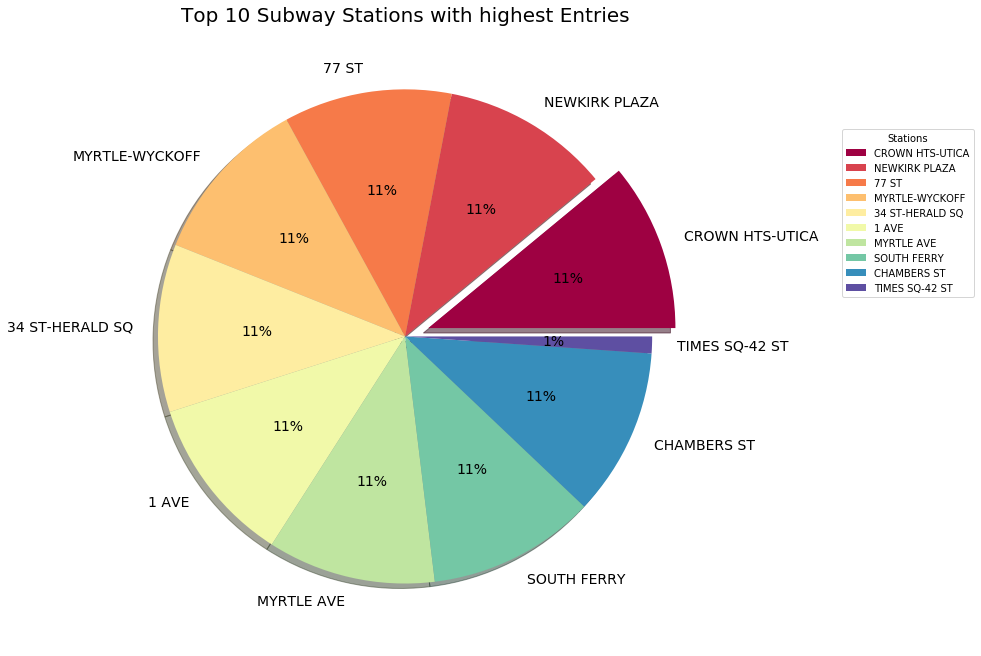

In [22]:
import matplotlib.gridspec as gridspec
# Pie chart, where the slices will be ordered and plotted counter-clockwise:

df_1 = pandas_df["Station"]
df_2 = pandas_df["Entries"]

#Create a pie chart for top 10 categories
plt.figure(1, figsize=(35,25))
the_grid = gridspec.GridSpec(2, 2)
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)
cmap = plt.get_cmap("Spectral")
colors = [cmap(i) for i in np.linspace(0, 1, 10)]
plt.subplot(the_grid[0, 0], aspect=1)
plt.title("Top 10 Subway Stations with highest Entries", fontsize=20)
pie = plt.pie(df_2,labels=df_1, autopct="%.0f%%", shadow=True, colors=colors, explode=explode, textprops={"fontsize": 14})

#Create a legend
plt.legend(df_1,
         title= "Stations",
         loc= "center left",
         bbox_to_anchor=(1.2, 0.2, 0, 1))
plt.show()

In [20]:
df3 = df.sort('Exits                                                     ', ascending=False).limit(10)
df3.show()

+----+----+--------+---------------+---------+--------+----------+--------+-----------+--------+----------------------------------------------------------+
| C/A|Unit|     SCP|        Station|Line Name|Division|      Date|    Time|Description| Entries|Exits                                                     |
+----+----+--------+---------------+---------+--------+----------+--------+-----------+--------+----------------------------------------------------------+
|N187|R419|00-00-02|ROCKAWAY PARK B|       AS|     IND|11/11/2016|12:00:00|    REGULAR| 3425669|                                                   9999999|
|N078|R175|01-03-00|          14 ST|     ACEL|     IND|04/30/2014|05:00:00|    REGULAR| 6983382|                                                   9999998|
|N067|R012|00-00-04| 34 ST-PENN STA|      ACE|     IND|10/13/2018|00:00:00|    REGULAR|10362795|                                                   9999996|
|E012|R372|00-00-00|         18 AVE|        D|     BMT|09/09/201

In [23]:
pandas_df_exits = df3.toPandas()
pandas_df_exits

,C/A,Unit,SCP,Station,Line Name,Division,Date,Time,Description,Entries,Exits
0,N187,R419,00-00-02,ROCKAWAY PARK B,AS,IND,11/11/2016,12:00:00,REGULAR,3425669,9999999
1,N078,R175,01-03-00,14 ST,ACEL,IND,04/30/2014,05:00:00,REGULAR,6983382,9999998
2,N067,R012,00-00-04,34 ST-PENN STA,ACE,IND,10/13/2018,00:00:00,REGULAR,10362795,9999996
3,E012,R372,00-00-00,18 AVE,D,BMT,09/09/2014,00:00:00,REGULAR,10521524,9999994
4,N505,R022,02-00-08,34 ST-HERALD SQ,BDFMNQRW,IND,09/26/2018,16:00:00,REGULAR,11617966,9999994
5,R422,R428,00-00-01,BUHRE AVE,6,IRT,05/11/2014,09:00:00,REGULAR,2120692,999999
6,N605,R024,00-00-06,SUTPHIN-ARCHER,EJZ,IND,05/05/2016,00:00:00,REGULAR,2771425,999999
7,R612,R057,01-03-02,ATL AV-BARCLAY,BDNQR2345,IRT,06/21/2018,20:00:00,REGULAR,1021968,999999
8,R402,R446,00-00-02,BROOK AV,6,IRT,06/02/2016,09:00:00,REGULAR,4441478,999999
9,B015,R098,01-06-00,CHURCH AVE,BQ,BMT,06/09/2015,00:00:00,REGULAR,204799,999999


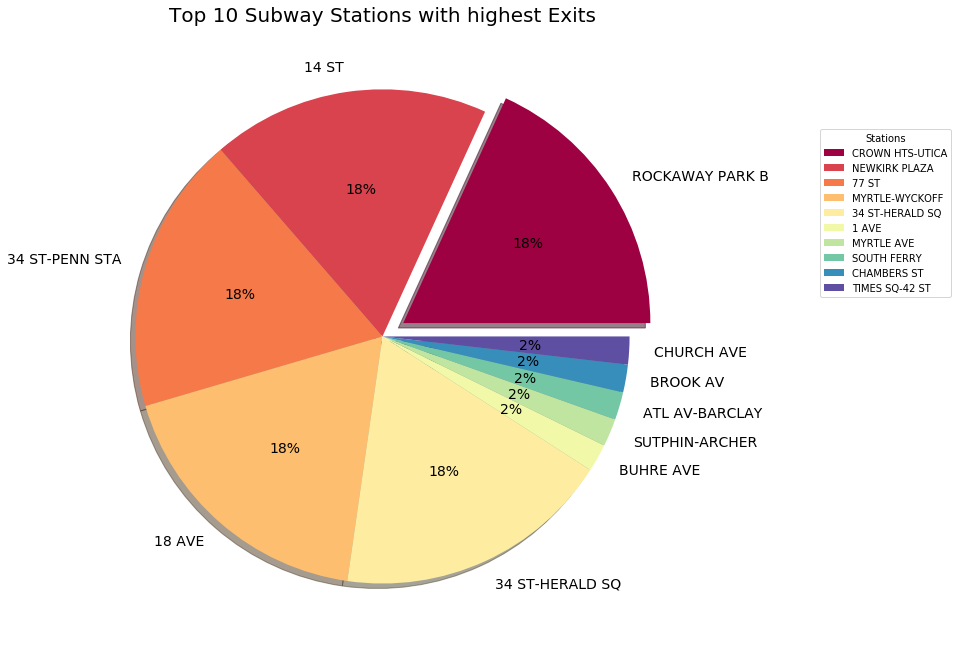

In [25]:
df_1_exits = pandas_df_exits["Station"]
df_2_exits = pandas_df_exits['Exits                                                     ']

#Create a pie chart for top 10 categories
plt.figure(1, figsize=(35,25))
the_grid = gridspec.GridSpec(2, 2)
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)
cmap = plt.get_cmap("Spectral")
colors = [cmap(i) for i in np.linspace(0, 1, 10)]
plt.subplot(the_grid[0, 0], aspect=1)
plt.title("Top 10 Subway Stations with highest Exits", fontsize=20)
pie = plt.pie(df_2_exits,labels = df_1_exits, autopct="%.0f%%", shadow=True, colors=colors, explode=explode, textprops={"fontsize": 14})

#Create a legend
plt.legend(df_1,
         title= "Stations",
         loc= "center left",
         bbox_to_anchor=(1.2, 0.2, 0, 1))
plt.show()

# Machine Learning 

